In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import seaborn as sns

In [40]:
data = pd.read_csv('Electric Vehicle Sales by State in India.csv')
data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,01-01-2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,01-01-2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,01-01-2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,01-01-2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,01-01-2014,Andhra Pradesh,BUS,Bus,Bus,0


## Basic Information
This section performs exploratory data analysis (EDA) to understand the dataset's structure, including:
- Data types and non-null counts (`info()`)
- Shape of the dataset (number of rows and columns)
- First and last five rows to inspect the data
- Column names
- Basic statistical summary (`describe()`) to analyze metrics like mean, min, max, and standard deviation for numerical columns.

In [41]:
print("Basic INformation\n\n",data.info())
print()
print("Shape of the dataset:",data.shape)
print("First Data\n\n",data.head())
print()
print("Last 5 data\n\n",data.tail())
print()
print("Colunms :\n\n",data.columns)
print()
print("Basic Statictis",data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   Date               96845 non-null  object
 3   State              96845 non-null  object
 4   Vehicle_Class      96845 non-null  object
 5   Vehicle_Category   96845 non-null  object
 6   Vehicle_Type       96845 non-null  object
 7   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB
Basic INformation

 None

Shape of the dataset: (96845, 8)
First Data

    Year Month_Name        Date           State         Vehicle_Class  \
0  2014        jan  01-01-2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014        jan  01-01-2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014        jan  01-01-2014  Andhra Pradesh             AMBULANCE   
3  2014     

In [42]:
print(data.shape)
print(data.columns)

(96845, 8)
Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')


## Checking for Missing Values
This section checks the dataset for any missing values in each column using `isnull().sum()`. This is an important step to ensure the data is complete before proceeding with analysis or modeling.

In [43]:
data.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

## Feature Addition

## 📊 Distribution of EV Types by State, Class, Category, and Type

This section visualizes the distribution of electric vehicles across four key categorical variables:

- `State`
- `Vehicle_Class`
- `Vehicle_Category`
- `Vehicle_Type`

For each variable:

- A **count plot** is generated using `seaborn` to show the number of occ



C:\Users\HP\AppData\Local\Temp\ipykernel_23092\697807712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=i,palette="viridis",hue=None,order=data[i].value_counts(ascending=True).index)


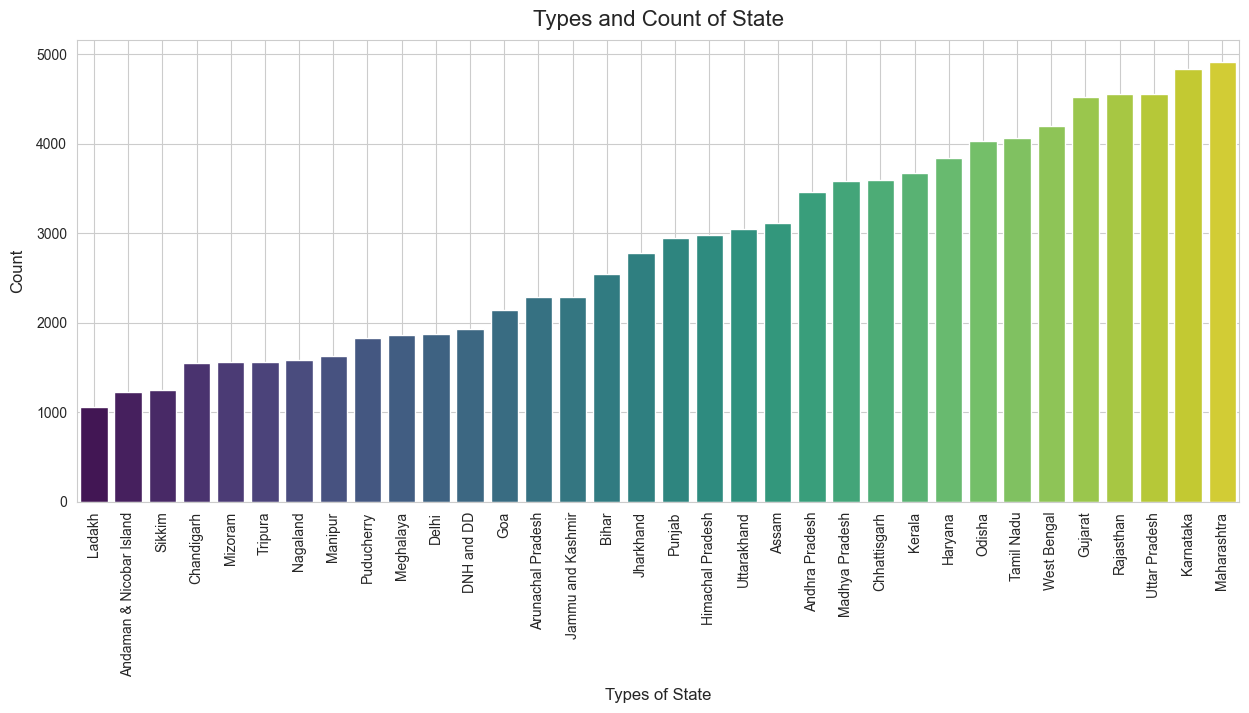

C:\Users\HP\AppData\Local\Temp\ipykernel_23092\697807712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=i,palette="viridis",hue=None,order=data[i].value_counts(ascending=True).index)


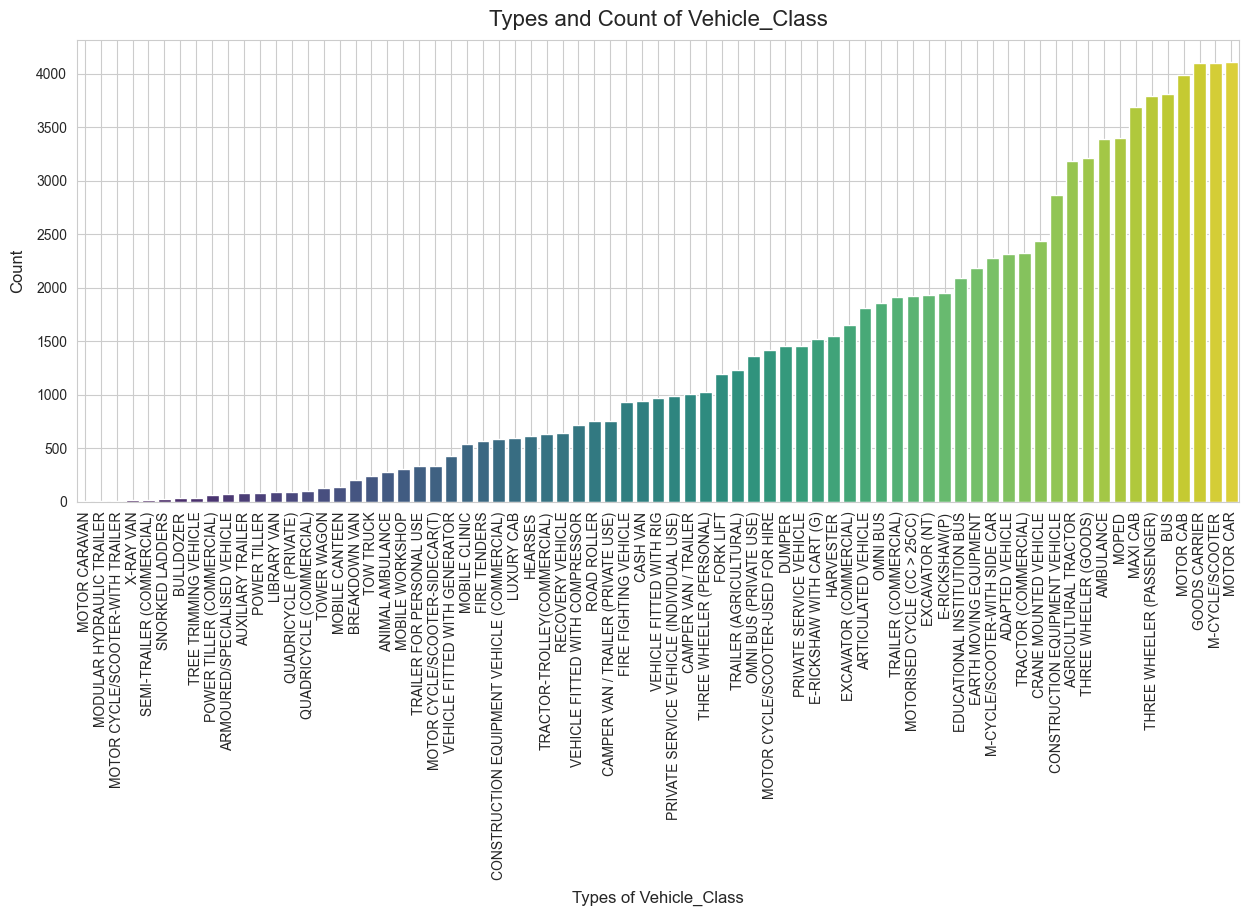

C:\Users\HP\AppData\Local\Temp\ipykernel_23092\697807712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=i,palette="viridis",hue=None,order=data[i].value_counts(ascending=True).index)


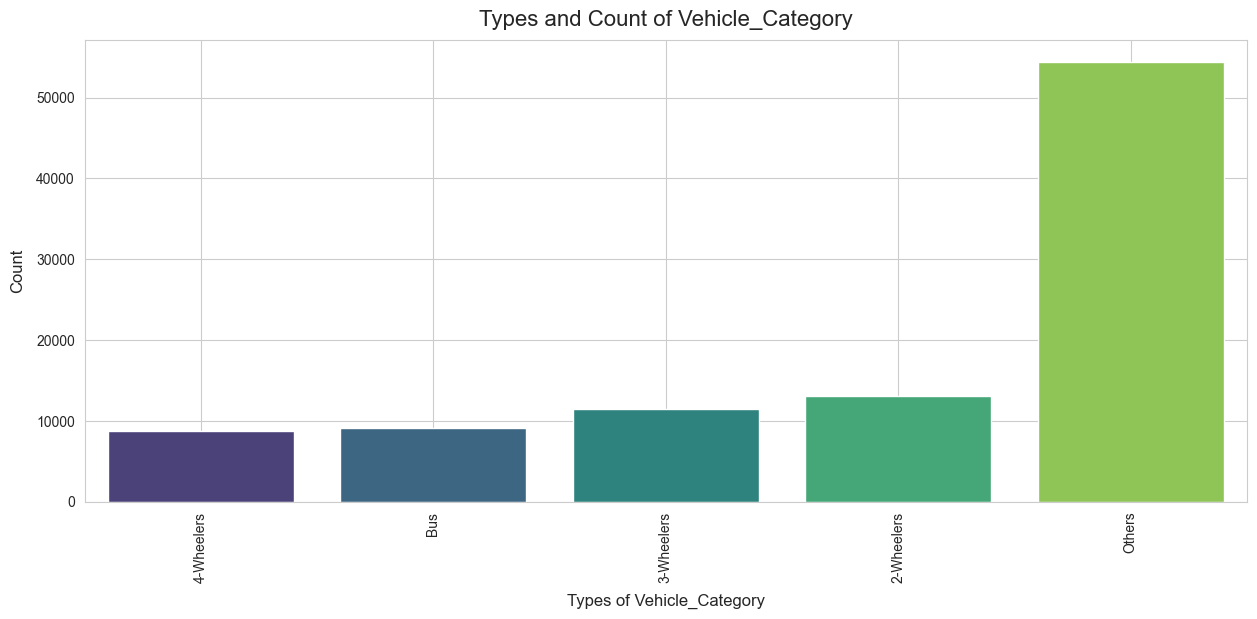

C:\Users\HP\AppData\Local\Temp\ipykernel_23092\697807712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=i,palette="viridis",hue=None,order=data[i].value_counts(ascending=True).index)


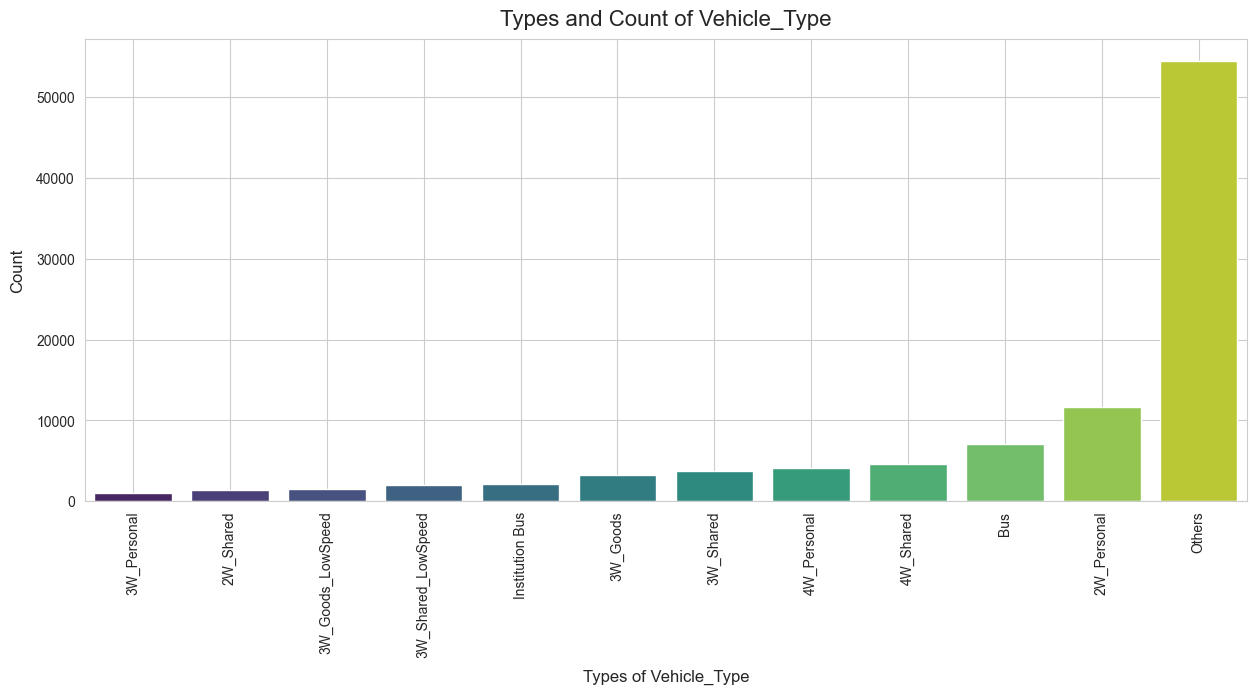

In [44]:
array = ['State','Vehicle_Class','Vehicle_Category','Vehicle_Type']
for i in array:
    plt.figure(figsize=(15,6))
    sns.set_style('whitegrid')  
    sns.countplot(data=data,x=i,palette="viridis",hue=None,order=data[i].value_counts(ascending=True).index)
    plt.title(f"Types and Count of {i}", fontsize=16, pad=10)
    plt.ylabel("Count",labelpad=8,fontsize=12)
    plt.xlabel(f"Types of {i}",labelpad=8,fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.savefig(f'Outputs/Types and Count of {i}')
    plt.show()

## 📈 Number of EV Sales Per Year

This section visualizes the total number of electric vehicle (EV) sales per year using a line plot:

- The `Year` column is used to count the number of EV sales entries per year.
- The year 2024 is excluded from the plot (if present) to avoid incomplete data.
- A line plot is generated using `seaborn` to illustrate the sales trend over time.
- The plot includes markers, grid lines, and labeled axes for better readability.
- The final chart is saved to the `Outputs` directory.

This visualization helps track how EV adoption has grown across years.


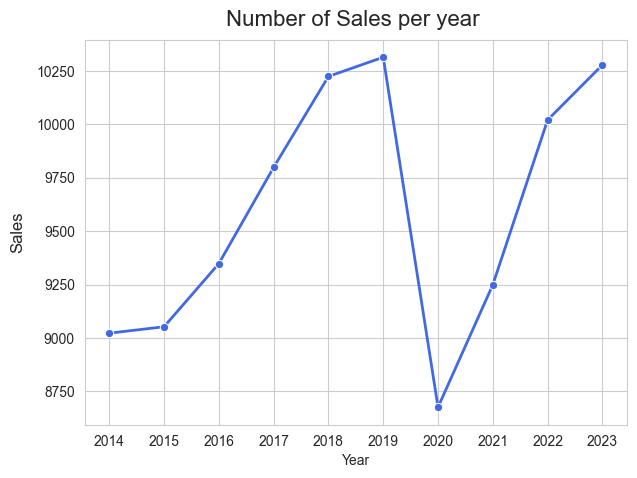

In [45]:
yearcount = data['Year'].value_counts().sort_index().drop(2024, errors='ignore')
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.lineplot(x=yearcount.index,y=yearcount.values,marker='o', color='royalblue', linewidth=2)
plt.xticks(ticks=yearcount.index)
plt.title("Number of Sales per year ",fontsize=16, pad=10)
plt.ylabel("Sales",labelpad=8,fontsize=12)
plt.grid(True)
plt.savefig(f'Outputs/Number of Sales per year')
plt.show()

## 📈 Total EV Sales Quantity Per Year

This section aggregates and visualizes the **total quantity of electric vehicle (EV) sales per year**:

- The data is grouped by the `Year` column, and the `EV_Sales_Quantity` is summed to compute yearly totals.
- The year 2024 is excluded to ensure accurate trend analysis.
- A line plot is generated using `seaborn`, with markers and custom styling.
- The x-axis displays each year, while the y-axis shows the total sales quantity.
- The plot is saved as an image file in the `Outputs` directory.

This visualization highlights the overall growth of EV sales in India across the years.

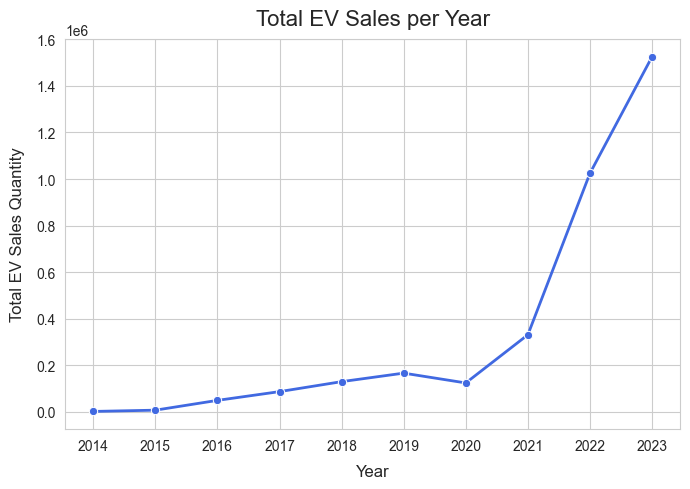

In [46]:
# yearcount = data['Year'].value_counts().sort_index()
# Group full data by Year and sum EV_Sales_Quantity
yearly_total_sales = data.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
yearly_total_sales = yearly_total_sales[yearly_total_sales['Year'] != 2024]
# Plot
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')

sns.lineplot(
    x='Year',
    y='EV_Sales_Quantity',
    data=yearly_total_sales,
    marker='o',
    color='royalblue',
    linewidth=2
)

plt.title("Total EV Sales per Year", fontsize=16, pad=10)
plt.xlabel("Year", labelpad=8, fontsize=12)
plt.ylabel("Total EV Sales Quantity", labelpad=8, fontsize=12)
plt.xticks(ticks=yearcount.index)
plt.grid(True)
plt.tight_layout()
plt.savefig('Outputs/Number_of_EV_Sales_Per_Year.png')
plt.show()

## 📊 EV Sales Trends by Vehicle Usage Type (Personal, Shared, Goods)

This section analyzes and visualizes electric vehicle (EV) sales trends based on vehicle usage type:

### 🔍 Data Segmentation
- The dataset is filtered into three subsets based on `Vehicle_Type`:
  - **Personal** vehicles
  - **Shared** vehicles (e.g., ride-hailing, taxi fleets)
  - **Goods** vehicles (commercial transport)
- Only entries with non-negative sales quantities are included.
- The year 2024 is excluded to avoid incomplete data bias.

### 📈 Plot 1: Number of EV Vehicle Entries Per Year
- Uses `value_counts()` to count the number of vehicle entries per year for each usage type.
- A multi-line plot is generated with distinct colors and markers for each vehicle type.
- Helps understand the number of vehicles recorded annually in each category.

### 📈 Plot 2: Total EV Sales Quantity Per Year by Type
- Groups each vehicle type by year and sums up `EV_Sales_Quantity`.
- Plots the yearly sales quantity for Personal, Shared, and Goods EVs.
- Also includes the **Total** EV sales trend for comparison.

### 📦 Output
- Both plots are saved to the `Outputs` directory.
- These visualizations reveal how adoption patterns vary between vehicle usage categories over time.


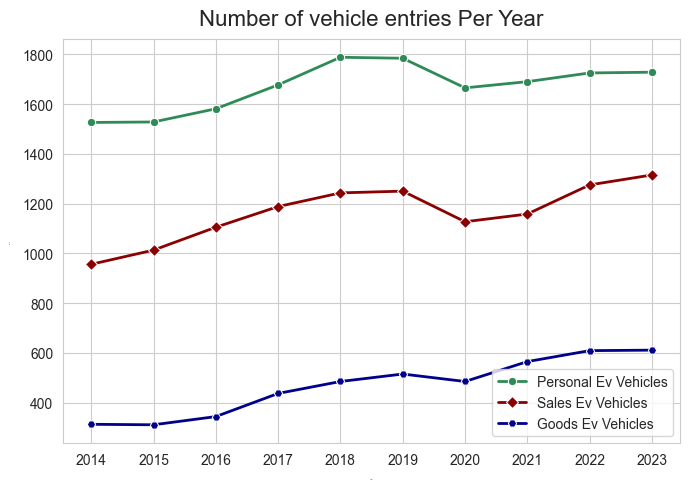

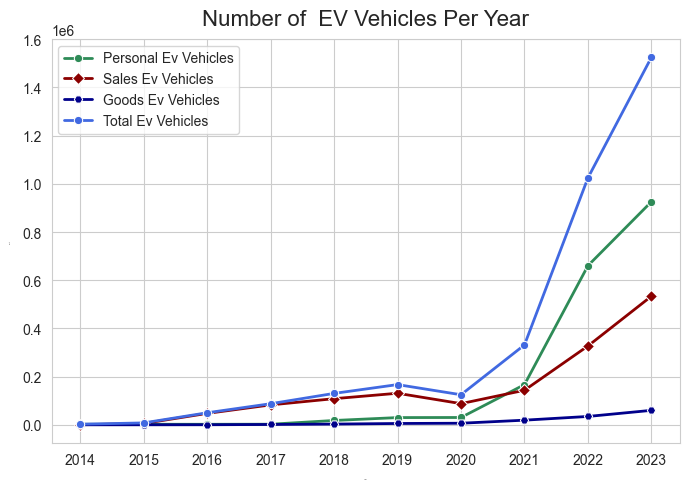

In [ ]:
personal = data.loc[(data['Vehicle_Type'].str.contains(pat='Personal', case=False, na=False)) & (data['EV_Sales_Quantity'] >= 0)]
shared = data.loc[(data['Vehicle_Type'].str.contains(pat='Shared', case=False, na=False)) & (data['EV_Sales_Quantity'] >= 0)]
goods = data.loc[(data['Vehicle_Type'].str.contains(pat='goods', case=False, na=False)) & (data['EV_Sales_Quantity'] >= 0)]
yearcountp = personal['Year'].value_counts().sort_index().drop(2024, errors='ignore')
yearcounts = shared['Year'].value_counts().sort_index().drop(2024, errors='ignore')
yearcountg = goods['Year'].value_counts().sort_index().drop(2024, errors='ignore')

yearly_salesp = personal.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
yearly_saless = shared.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
yearly_salesg = goods.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
yearly_salesp = yearly_salesp[yearly_salesp['Year'] != 2024]
yearly_saless = yearly_saless[yearly_saless['Year'] != 2024]
yearly_salesg = yearly_salesg[yearly_salesg['Year'] != 2024]



plt.figure(figsize=(7,5))
sns.set_style('whitegrid')

sns.lineplot(x=yearcountp.index,y=yearcountp.values,label='Personal Ev Vehicles', marker='o', color='seagreen', linewidth=2)
sns.lineplot(x=yearcounts.index,y=yearcounts.values,label='Sales Ev Vehicles', marker='D', color='darkred', linewidth=2)
sns.lineplot(x=yearcountg.index,y=yearcountg.values,label='Goods Ev Vehicles', marker='H', color='darkblue', linewidth=2)
plt.title('Number of vehicle entries Per Year',fontsize=16, pad=10)
plt.xlabel('Year',labelpad=8,fontsize=1)
plt.ylabel('Count',labelpad=8,fontsize=1)
plt.tight_layout()
plt.xticks(ticks=yearcount.index)
plt.grid(True)
plt.legend()
plt.savefig(f'Outputs/Number of   Entries Per Year')
plt.show()

plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=yearly_salesp,label='Personal Ev Vehicles', marker='o', color='seagreen', linewidth=2,)
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=yearly_saless,label='Sales Ev Vehicles', marker='D', color='darkred', linewidth=2)
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=yearly_salesg,label='Goods Ev Vehicles', marker='H', color='darkblue', linewidth=2)
sns.lineplot(
    x='Year',
    y='EV_Sales_Quantity',
    data=yearly_total_sales,label='Total Ev Vehicles',
    marker='o',
    color='royalblue',
    linewidth=2
)
plt.legend()
plt.xticks(ticks=yearcount.index)
plt.title('Number of  EV Vehicles Per Year',fontsize=16, pad=10)
plt.xlabel('Year',labelpad=8,fontsize=1)
plt.ylabel('Count',labelpad=8,fontsize=1)
plt.tight_layout()
plt.grid(True)
plt.savefig(f'Outputs/Number of EV Vehicles Per Year')
plt.show()

## 📍 EV Sales by State in India

This section visualizes the total number of electric vehicle (EV) sales across different Indian states:

- The data is grouped by the `State` column and the `EV_Sales_Quantity` is summed to calculate total EV sales per state.
- A **bar plot** is created using `seaborn` to show EV sales distribution by state.
- The `viridis` color palette is used for a visually distinct representation.
- X-axis labels (states) are rotated for better readability.
- The plot is saved to the `Outputs` directory.

This visualization highlights which states have the highest and lowest EV sales, offering insights into regional adoption trends.


C:\Users\HP\AppData\Local\Temp\ipykernel_23092\1511255832.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


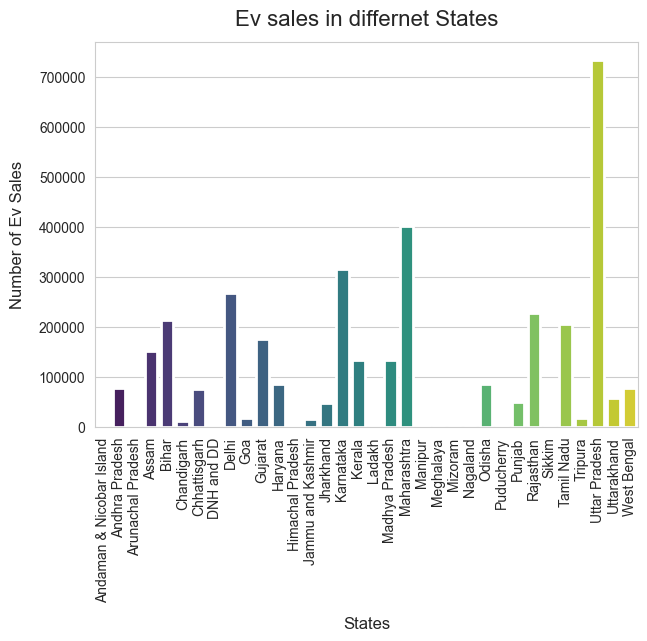

In [48]:
ev_sales_per_sate = data.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')

sns.barplot(
    x='State',
    y='EV_Sales_Quantity',
    data=ev_sales_per_sate,
    linewidth=2,palette="viridis"
)
plt.title("Ev sales in differnet States",fontsize=16,pad=12)
plt.xlabel("States",fontsize=12,labelpad=10)
plt.ylabel("Number of Ev Sales",fontsize=12,labelpad=10)
plt.xticks(rotation=90)
plt.savefig("Outputs/Ev sales in differnet States")
plt.show()

## 🏆 Top 10 EV Selling States in India

This section identifies and visualizes the top 10 states in India with the highest total electric vehicle (EV) sales:

- The dataset is grouped by the `State` column and the `EV_Sales_Quantity` is summed.
- The top 10 states with the highest sales are selected using `sort_values()`.
- A **bar plot** is created to display the total EV sales for these leading states.
- The `viridis` color palette is used for visual appeal, and state labels are rotated for readability.
- The chart is saved to the `Outputs` directory.

This visualization helps pinpoint the states leading the EV adoption movement in India.


C:\Users\HP\AppData\Local\Temp\ipykernel_23092\878303924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


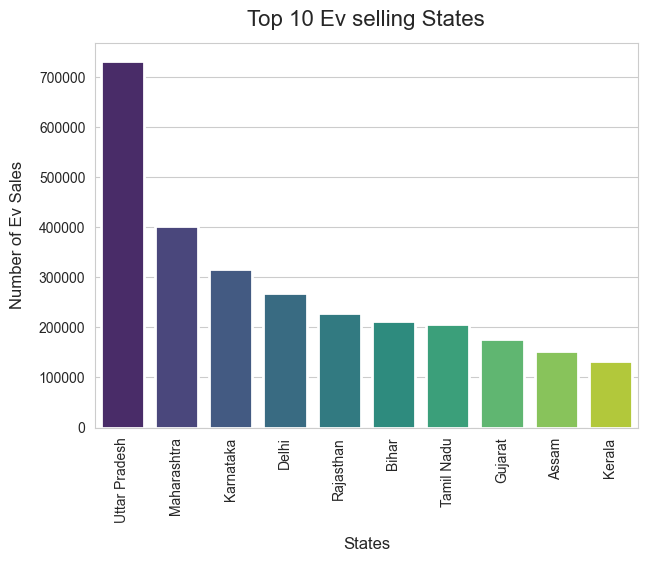

In [49]:
ev_sales_per_sate = data.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')

sns.barplot(
    x='State',
    y='EV_Sales_Quantity',
    data=ev_sales_per_sate,
    linewidth=2,palette="viridis"
)
plt.title("Top 10 Ev selling States",fontsize=16,pad=12)
plt.xlabel("States",fontsize=12,labelpad=10)
plt.ylabel("Number of Ev Sales",fontsize=12,labelpad=10)
plt.xticks(rotation=90)
plt.savefig("Outputs/Top 10 Ev selling States")
plt.show()

## 🥧 EV Sales Distribution by Year

This section visualizes the **proportional distribution** of electric vehicle (EV) sales across different years using a pie chart:

- A **pie chart** is created using the total `EV_Sales_Quantity` per year.
- Labels are positioned slightly outside the pie using the `labeldistance` parameter.
- `wedgeprops` are used to enhance the visual style with white borders.
- The figure is sized to ensure clear visibility of each year’s share.
- The plot is saved to the `Outputs` directory.

This visualization helps understand how EV sales have been distributed over the years, highlighting years of major growth or decline.


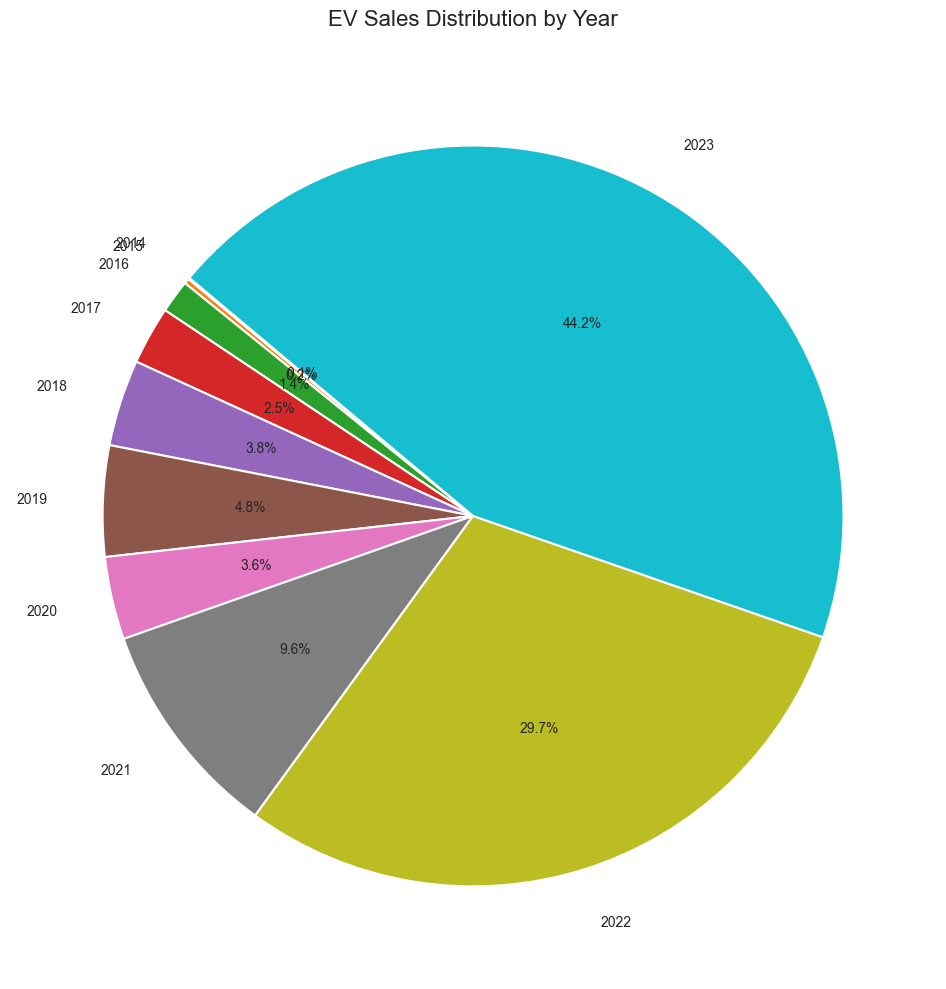

In [50]:
# Set the figure size to make the pie chart bigger
plt.figure(figsize=(10, 10))

# Plot pie chart with adjusted label distance
plt.pie(
    x=yearly_total_sales['EV_Sales_Quantity'],
    labels=yearly_total_sales['Year'],
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.15,  # Moves labels farther from the pie
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}  # optional: style wedges
)

plt.title("EV Sales Distribution by Year", fontsize=16, pad=20)
plt.savefig("Outputs/EV Sales Distribution by Year")
plt.tight_layout()
plt.show()


## 🧠 Importing Machine Learning Libraries

This section imports essential libraries from `scikit-learn` to prepare for building and evaluating machine learning models:

- `LinearRegression`: For creating a linear regression model.
- `RandomForestRegressor`: An ensemble learning model for regression tasks using decision trees.
- `mean_squared_error`, `mean_absolute_error`, `r2_score`: Evaluation metrics to assess model performance.
- `train_test_split`: To split the dataset into training and testing subsets.

These tools will be used to model and predict electric vehicle sales based on various features.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

## 🧹 Preparing Data for Model Training

This section prepares the dataset for regression modeling:

- Excludes the year 2024 from the dataset to avoid using incomplete or future data.
- Defines the **features (`X`)** as the `Year` column.
- Defines the **target (`y`)** as the `EV_Sales_Quantity` column.
- Both `X` and `y` are reshaped to meet the input requirements of `scikit-learn` models.

This setup is essential for training machine learning models to predict EV sales based on year-wise trends.


In [52]:
data1 = yearly_total_sales[yearly_total_sales['Year'] != 2024]

X = data1['Year'].values.reshape(-1, 1)
y = data1['EV_Sales_Quantity'].values.reshape(-1, 1)

## 📈 Linear Regression Model for EV Sales Prediction

This section builds and evaluates a **Linear Regression** model to predict EV sales based on year-wise trends:

### 🧪 Data Splitting
- The data is split into training and testing sets using `train_test_split`.
- `shuffle=False` ensures chronological order is maintained (important for time series data).
- 80% of the data is used for training and 20% for testing.

### 🏗️ Model Training & Prediction
- A `LinearRegression` model is trained on the training set.
- Predictions are made on the test set using the trained model.

### 📊 Model Evaluation
- **Mean Absolute Error (MAE)**: Measures average prediction error.
- **Root Mean Squared Error (RMSE)**: Penalizes larger errors more heavily.
- **R² Score**: Indicates the proportion of variance in the target explained by the model.

These metrics help assess the accuracy and performance of the model in capturing sales trends over time.


In [53]:
# Split (no shuffle for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 4))

Mean Absolute Error (MAE): 967011.14
Root Mean Squared Error (RMSE): 994147.8
R² Score: -14.7845


## 📉 Linear Regression: Actual vs. Predicted EV Sales

This section visualizes the performance of the Linear Regression model:

- **Training data** and **actual test data** are plotted to show the historical sales trend.
- **Predicted values** from the model are plotted alongside the actual test data to illustrate prediction accuracy.
- Evaluation metrics (**MAE**, **RMSE**, and **R² Score**) are displayed in a styled annotation box within the plot.
- The plot includes labels, grid lines, and a legend for clarity.

This visualization makes it easy to compare the model’s predictions with real-world values and assess how well the model captures EV sales trends.


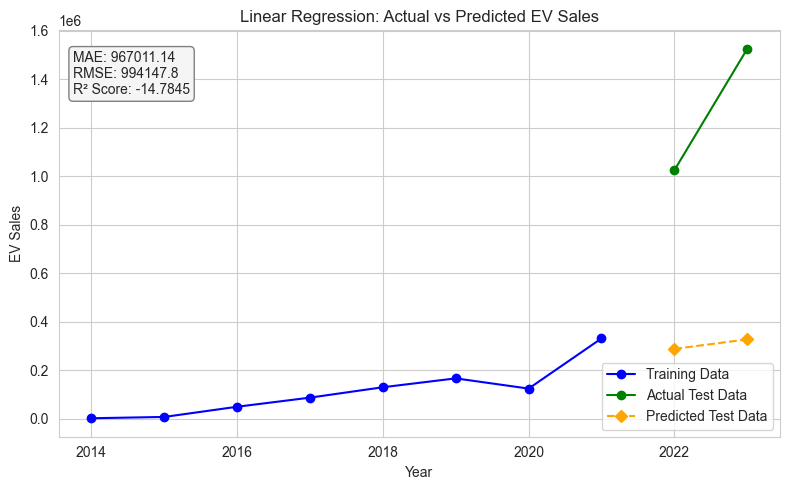

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(X_train, y_train, label='Training Data', marker='o', color='blue')
plt.plot(X_test, y_test, label='Actual Test Data', marker='o', color='green')
plt.plot(X_test, y_pred, label='Predicted Test Data', marker='D', linestyle='--', color='orange')

# Add metric annotations to the plot
metric_text = f"MAE: {round(mae, 2)}\nRMSE: {round(rmse, 2)}\nR² Score: {round(r2, 4)}"
plt.text(
    0.02, 0.95, metric_text,
    transform=plt.gca().transAxes,  # relative position inside plot
    fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='whitesmoke', edgecolor='gray')
)

# Labels and styling
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('Linear Regression: Actual vs Predicted EV Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🧾 Encoding Categorical Features with One-Hot Encoding

This section prepares the dataset for machine learning by converting categorical variables into numerical format:

- `pd.get_dummies()` is used to apply **one-hot encoding** to the following columns:
  - `State`
  - `Vehicle_Class`
  - `Vehicle_Category`
  - `Vehicle_Type`
- The `drop_first=True` parameter avoids multicollinearity by dropping the first category from each encoded column.
- Columns `Date` and `Month_Name` are removed as they are not needed for modeling.

This transformation enables the use of categorical data in regression models like Random Forest and Linear Regression.


In [57]:
df = pd.get_dummies(data,columns=['State','Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'],drop_first=True)
df.drop(['Date', 'Month_Name'], axis=1, inplace=True)

## 🌲 Random Forest Regressor for EV Sales Prediction

This section builds a **Random Forest Regressor** to predict electric vehicle (EV) sales based on all numerical and one-hot encoded features:

### 🧪 Data Preparation
- Features (`X`) are created by dropping the `EV_Sales_Quantity` column.
- The target (`y`) is set as the `EV_Sales_Quantity`.
- The dataset is split into training and testing sets (80/20 split) using a fixed random seed for reproducibility.

### 🏗️ Model Training
- A `RandomForestRegressor` with 100 estimators is trained on the training set.

### 📊 Model Evaluation
- Predictions are made on the test set.
- Evaluation metrics include:
  - **Mean Absolute Error (MAE)**
  - **Root Mean Squared Error (RMSE)**
  - **R² Score** (coefficient of determination)

This model leverages both numerical and categorical inputs to predict EV sales more effectively than linear models, especially when complex patterns exist in the data.


In [58]:
X = df.drop('EV_Sales_Quantity', axis=1)
y = df['EV_Sales_Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean error:",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean error: 12.954339262576216
Root Mean Squared Error (RMSE): 143.3552745901236
R² Score: 0.921082149333493


## 📊 Random Forest: Actual vs. Predicted EV Sales

This section visualizes the **prediction performance** of the Random Forest Regressor model:

- The actual and predicted EV sales values are plotted against the test sample index.
- The plot uses distinct colors and markers to differentiate between actual and predicted sales.
- An annotation box is included within the plot, showing the key evaluation metrics:
  - **MAE (Mean Absolute Error)**
  - **RMSE (Root Mean Squared Error)**
  - **R² Score (Goodness of Fit)**

This visualization provides a clear, side-by-side comparison of the model's predictions versus the actual EV sales data, helping to assess how accurately the model generalizes to unseen samples.


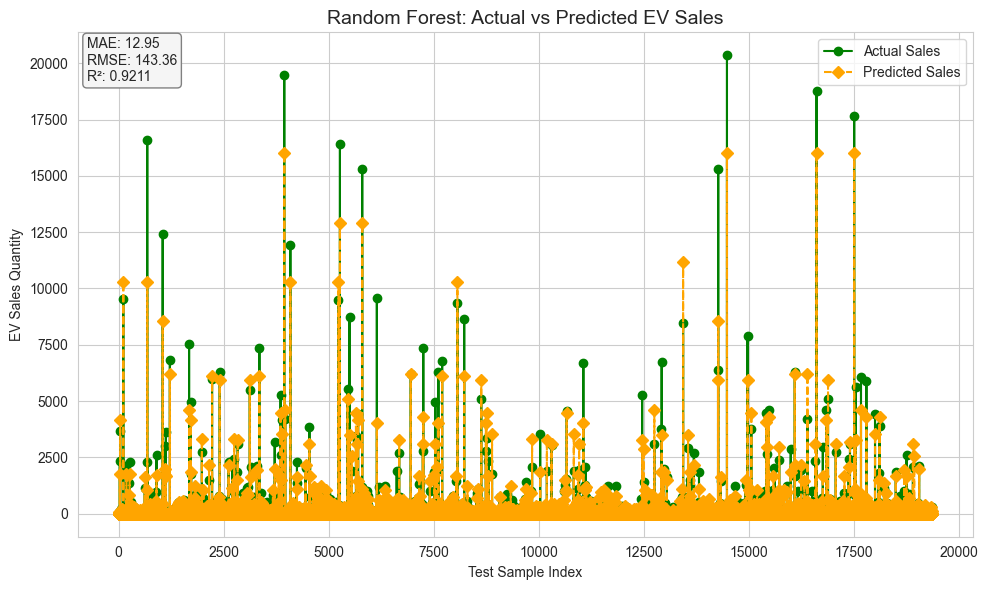

In [62]:
y_test_sorted = y_test.reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred).sort_index()

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Sales', marker='o', color='green')
plt.plot(y_pred_sorted, label='Predicted Sales', marker='D', linestyle='--', color='orange')

# Add metrics as annotation
metric_text = f"MAE: {round(mean_absolute_error(y_test, y_pred), 2)}\n" \
              f"RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)}\n" \
              f"R²: {round(r2_score(y_test, y_pred), 4)}"

plt.text(0.01, 0.99, metric_text,
         transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='whitesmoke', edgecolor='gray'))

# Plot labels
plt.title("Random Forest: Actual vs Predicted EV Sales", fontsize=14)
plt.xlabel("Test Sample Index")
plt.ylabel("EV Sales Quantity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 📆 Year-wise EV Sales Forecast using Random Forest Regressor

This section provides a **year-wise comparison** of actual vs. predicted electric vehicle (EV) sales using the Random Forest model:

### 📋 Plot Preparation
- The corresponding `Year` values for the test set are extracted and combined with actual and predicted sales into a DataFrame.
- The data is **melted** into long format using `pd.melt()` for easy plotting with `seaborn`.

### 📈 Visualization
- A **line plot** shows the EV sales trends for both actual and predicted values across different years.
- The plot includes:
  - Markers for each point.
  - Separate color-coded lines for “Actual Sales” and “Predicted Sales”.
  - Annotations for evaluation metrics: **MAE**, **RMSE**, and **R² Score**.

This visualization gives a clearer understanding of the model's forecasting ability across different years, rather than just per sample.


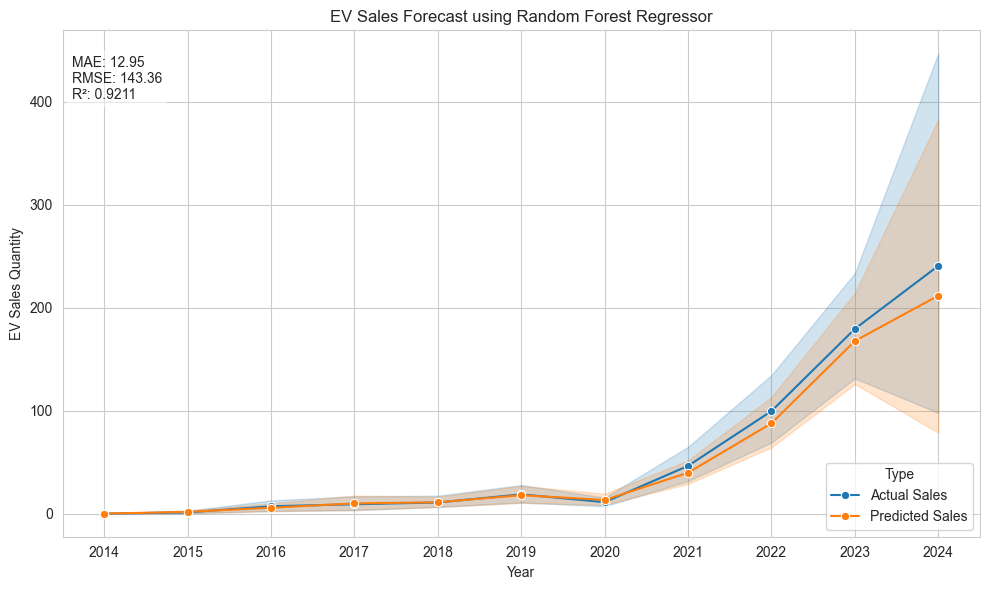

In [67]:
# Also split years accordingly
years = data.loc[df.index, 'Year']
years_train = years.iloc[X_train.index]
years_test = years.iloc[X_test.index]
# Create DataFrame for plotting
df_plot = pd.DataFrame({
    'Year': years_test.values,
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})

# Melt for seaborn lineplot
df_plot_melted = df_plot.melt(id_vars='Year', value_vars=['Actual Sales', 'Predicted Sales'],
                              var_name='Type', value_name='EV Sales Quantity')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_plot_melted, x='Year', y='EV Sales Quantity', hue='Type', marker='o')

# Annotate metrics
plt.text(0.01, 0.95, f"MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.4f}", transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.title('EV Sales Forecast using Random Forest Regressor')
plt.grid(True)
plt.xticks(sorted(df_plot['Year'].unique()))
plt.tight_layout()
plt.show()